<h2>Naive Bayes Classifier</h2>
<p>This dataset is a suedo dataset of spam/non-spam email with 57 dimensions with one binary target y.</p>
<p>The data consists of examples of spam and non-spam emails, of which there are 4508 training examples and 93 testing examples. The feature vector x is a 57-dimensional vector extracted from the email and y = 1 indicates a spam email. The data has been preprocessed such that the first 54-dimensions of each observation is binary and the last three dimensions are positive numbers.</p>

In [1]:
import pandas as pd
import numpy as np
PATH = 
train_x =pd.read_csv(PATH+'/X_train.csv',header=None)
train_y =pd.read_csv(PATH+'/y_train.csv',header=None)
test_x =pd.read_csv(PATH+'/X_test.csv',header=None)
test_y =pd.read_csv(PATH+'/y_test.csv',header=None)

train_x['y']=train_y
train_x_1 = train_x[train_x['y']==1]
train_x_0 = train_x[train_x['y']==0]

In [98]:
#Use 54 Bernoulli distributions for the 54 binary dimensions and 3 Pareto distributions for the last 3 positive dimensions.
#pi solved by hand
pi = np.sum(train_y)/len(train_y)

#theta
t = pd.DataFrame(columns=[0,1])
#for D1-D54: Bernoulli range(0,54)

for i in range(0,54):
    t.loc[i,1] = np.sum(train_x_1.loc[:,i])/len(train_x_1)
#for D55-57 range(54,57)
for i in range(54,57):
    s = 0
    for j in range(0,len(train_x_1)):
        s += np.log(train_x_1.iloc[j,i])
    t.loc[i,1] = len(train_x_1)/s

for i in range(0,54):
    t.loc[i,0] = np.sum(train_x_0.loc[:,i])/len(train_x_0)
#for D55-57 range(54,57)
for i in range(54,57):
    s = 0
    for j in range(0,len(train_x_0)):
        s += np.log(train_x_0.iloc[j,i])
    t.loc[i,0] = len(train_x_0)/s

In [99]:
def Bernoulli(x,w):
    return float(pow(w,x)*pow(1-w,1-x))

def Pareto(x,w):
    return float(w*pow(x,-(w+1)))

def bayes_classifier(x):
    y_0 = Bernoulli(0,pi)
    for i in range(0,54):
        y_0 = y_0*Bernoulli(x[i],t.loc[i,0])
    for i in range(54,57):
        y_0 = y_0*Pareto(x[i],t.loc[i,0])

    y_1 = Bernoulli(1,pi)
    for i in range(0,54):
        y_1 = y_1*Bernoulli(x[i],t.loc[i,1])
    for i in range(54,57):
        y_1 = y_1*Pareto(x[i],t.loc[i,1])  
        
    if y_1 > y_0: return 1
    else: return 0 
    

In [100]:
pred_y = [np.nan]*len(test_y)

for i in range(0,len(test_y)):
    pred_y[i] = bayes_classifier(test_x.loc[i,:])

#(y,y') a=(0,0),b=(0,1),c=(1,0),d=(1,1)
a,b,c,d=0,0,0,0
for i in range(0,len(test_y)):
    if (int(test_y.loc[i,:]) == 0) and (pred_y[i] == 0):a+=1
    if (int(test_y.loc[i,:]) == 0) and (pred_y[i] == 1):b+=1
    if (int(test_y.loc[i,:]) == 1) and (pred_y[i] == 0):c+=1
    if (int(test_y.loc[i,:]) == 1) and (pred_y[i] == 1):d+=1

In [101]:
print(a,b,'\n',c,d)
pred_accuracy = (a+d)/len(test_y)
pred_accuracy #accuracy is nearly 92.5%

54 2 
 5 32


0.9247311827956989

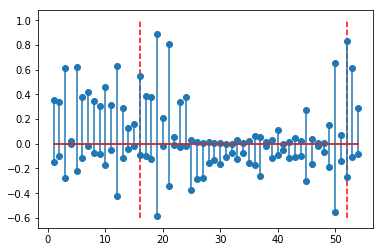

In [97]:
#which dimension gives more information: when the difference between index for spam/non-spam is higher.
from matplotlib import pyplot as plt
%matplotlib inline

stem_data = pd.DataFrame({0:list(-(train_x_0.iloc[:,0:54].sum())),1:list(train_x_1.iloc[:,0:54].sum())})
plt.stem(stem_data.index+1,t.iloc[0:54,0]*(-1))
plt.stem(stem_data.index+1,t.iloc[0:54,1])
plt.vlines(x=[16,52],ymin=-0.6,ymax=1,color='r',linestyle='--')
plt.show() #those highlighted dimension is the most informative ones.